In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
movies = pd.read_csv('tmdb-5000-movie-dataset/tmdb_5000_movies.csv')
movies['profit'] = movies['revenue'] - movies['budget']

In [3]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,635674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,834939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,24139100


In [4]:
movies['genres']=movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))# the key 'name' contains the name of the genre
    movies.loc[index,'genres']=str(list1)
    
# changing the keywords column from json to string
movies['keywords']=movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords']=str(list1)
    
## changing the production_companies column from json to string
movies['production_companies']=movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies']=str(list1)
    
# changing the production_countries column from json to string    
movies['production_countries']=movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_countries']=str(list1)


In [6]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000


In [7]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4.803000e+03
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,5.321560e+07
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,1.359677e+08
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,-7.995375e+05
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,2.511317e+06
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,5.531286e+07
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09


In [8]:
movies.id.dtypes

dtype('int64')

In [9]:
movies.status.unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

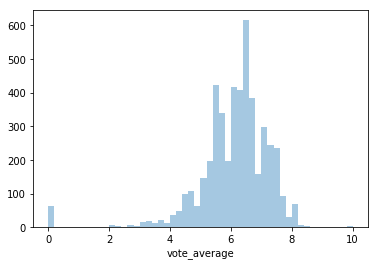

In [10]:
sns.distplot(movies['vote_average'], kde=False)

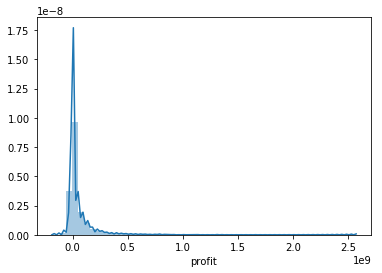

In [11]:
sns.distplot(movies['profit'])

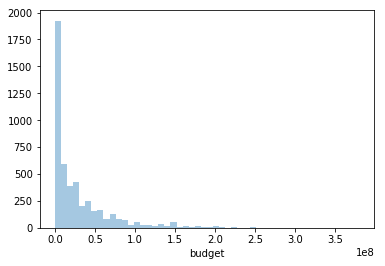

In [41]:
sns.distplot(movies['budget'], kde=None)

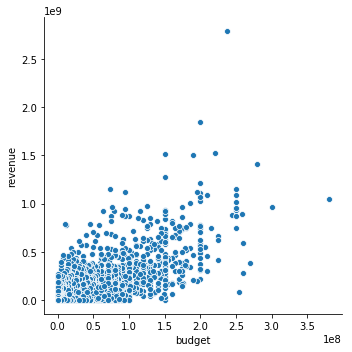

In [8]:
sns.relplot(x='budget', y = 'revenue', data=movies)

In [24]:
movies.loc[movies['profit'].idxmin()]

budget                                                          255000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                            http://disney.go.com/the-lone-ranger/
id                                                                  57201
keywords                [{"id": 1556, "name": "texas"}, {"id": 2673, "...
original_language                                                      en
original_title                                            The Lone Ranger
overview                The Texas Rangers chase down a gang of outlaws...
popularity                                                         49.047
production_companies    [{"name": "Walt Disney Pictures", "id": 2}, {"...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2013-07-03
revenue                                                          89289910
runtime                               

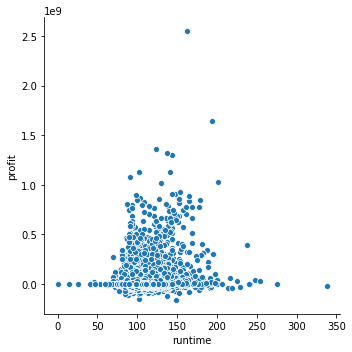

In [12]:
sns.relplot(x='runtime', y='profit', kind='scatter', data=movies)

In [ ]:
sns.catplot(x='')